import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset=pd.read_csv('advertising.csv')

In [17]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [18]:
x=dataset.iloc[:,0:3].values
y=dataset[["Sales"]].values
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [19]:
x = np.hstack((
    x,
    x[:, 0:1]**2, x[:, 1:2]**2, x[:, 2:3]**2,  # Carrés des caractéristiques
    x[:, 0:1] * x[:, 1:2], x[:, 0:1] * x[:, 2:3], x[:, 1:2] * x[:, 2:3],  # Interactions (degré 2)
    x[:, 0:1]**3, x[:, 1:2]**3, x[:, 2:3]**3,  # Cubes des caractéristiques
    x[:, 0:1]**2 * x[:, 1:2], x[:, 0:1]**2 * x[:, 2:3],  # X1² * X2, X1² * X3
    x[:, 1:2]**2 * x[:, 0:1], x[:, 1:2]**2 * x[:, 2:3],  # X2² * X1, X2² * X3
    x[:, 2:3]**2 * x[:, 0:1], x[:, 2:3]**2 * x[:, 1:2],  # X3² * X1, X3² * X2
    x[:, 0:1] * x[:, 1:2] * x[:, 2:3]  # Terme d'interaction X1 * X2 * X3
))
print(x.shape)
print(x[:10])

(200, 19)
[[2.30100000e+02 3.78000000e+01 6.92000000e+01 5.29460100e+04
  1.42884000e+03 4.78864000e+03 8.69778000e+03 1.59229200e+04
  2.61576000e+03 1.21828769e+07 5.40101520e+04 3.31373888e+05
  2.00135918e+06 3.66386389e+06 3.28776084e+05 9.88757280e+04
  1.10186606e+06 1.81010592e+05 6.01886376e+05]
 [4.45000000e+01 3.93000000e+01 4.51000000e+01 1.98025000e+03
  1.54449000e+03 2.03401000e+03 1.74885000e+03 2.00695000e+03
  1.77243000e+03 8.81211250e+04 6.06984570e+04 9.17338510e+04
  7.78238250e+04 8.93092750e+04 6.87298050e+04 6.96564990e+04
  9.05134450e+04 7.99365930e+04 7.88731350e+04]
 [1.72000000e+01 4.59000000e+01 6.93000000e+01 2.95840000e+02
  2.10681000e+03 4.80249000e+03 7.89480000e+02 1.19196000e+03
  3.18087000e+03 5.08844800e+03 9.67025790e+04 3.32812557e+05
  1.35790560e+04 2.05017120e+04 3.62371320e+04 1.46001933e+05
  8.26028280e+04 2.20434291e+05 5.47109640e+04]
 [1.51500000e+02 4.13000000e+01 5.85000000e+01 2.29522500e+04
  1.70569000e+03 3.42225000e+03 6.256950

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)

(160, 19)


In [21]:
def z_score_transform(data):
   mean=np.mean(data,axis=0)
   std=np.std(data,axis=0)
   data_normalized=(data-mean)/ std
   return data_normalized,mean,std

In [22]:
x_train_norm, mean,std=z_score_transform(x_train)
x_test_norm= (x_test - mean)/std
print(x_test_norm[:10])
print(x_train_norm[:10])

[[ 0.15781217  0.59112727  1.13227461 -0.11486841  0.35397123  0.94205829
   0.50183875  0.88062695  0.97687669 -0.30277061  0.1256825   0.63109803
   0.15899028  0.40166634  0.33700386  0.63128085  0.72789756  0.79047216
   0.81900317]
 [ 0.53925283  1.68199613  1.13227461  0.33794216  2.10942255  0.94205829
   1.75835198  1.24415002  1.93264278  0.13392169  2.4202704   0.63109803
   1.28257073  0.88721018  2.26811108  2.35204878  0.98591946  1.51452667
   2.02122246]
 [ 1.69783431  0.36753303  0.65380096  2.21022509  0.0821831   0.35296029
   1.44681051  1.74008652  0.47291934  2.61797911 -0.13929723  0.08862415
   1.97909343  2.23148253  0.82756011  0.16693234  0.98538055  0.21811253
   1.28392391]
 [-1.64363349  0.95023317  0.75245532 -1.15818806  0.85315007  0.46469155
  -0.92629999 -0.85548476  0.97265722 -0.91482142  0.68277675  0.1829643
  -0.80275855 -0.71791421 -0.67224831  0.85347431 -0.51605869  0.5808852
  -0.56558529]
 [ 0.83513672  1.77007871 -1.31928629  0.74500317  2.2

In [23]:
x_train_norm=np.hstack((x_train_norm,np.ones((x_train.shape[0],1))))
x_test_norm=np.hstack((x_test_norm,np.ones((x_test.shape[0],1))))
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train_norm[:10])

(160, 20)
(40, 20)
(160, 1)
(40, 1)
[[-0.40424839 -1.02823707 -0.33767538 -0.6344003  -0.93748644 -0.48921405
  -0.78692467 -0.39505518 -0.69943124 -0.69558293 -0.80131077 -0.46093785
  -0.6895931  -0.47506758 -0.73434788 -0.67967663 -0.40692249 -0.56462234
  -0.55947409  1.        ]
 [ 0.32060772 -0.91982774 -1.16143931  0.06847389 -0.90008756 -0.80055117
  -0.5595303  -0.72619044 -0.83224356 -0.13538081 -0.79094255 -0.55801721
  -0.47402236 -0.5630148  -0.67651559 -0.70046839 -0.56389411 -0.6245317
  -0.61463528  1.        ]
 [-1.27051084  0.2591237   0.25425079 -1.09051897 -0.03881329 -0.04785031
  -0.70913217 -0.64483881  0.15265483 -0.90378966 -0.24753373 -0.21215167
  -0.75161024 -0.67087106 -0.57076528 -0.07704647 -0.43219683 -0.10201406
  -0.45153701  1.        ]
 [-1.04235941 -0.6962335  -0.57444585 -1.01093566 -0.80071928 -0.61479796
  -0.81960978 -0.72462982 -0.64028011 -0.88104865 -0.75529065 -0.51081154
  -0.75240701 -0.6662273  -0.71367974 -0.64054963 -0.52479047 -0.56284

In [24]:
np.random.seed(0)
theta=np.random.randn(x_train_norm.shape[1],1)
theta.shape

(20, 1)

In [25]:
def model(x,theta):
   return x.dot(theta)
def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
cost_function(x_train_norm, y_train ,theta)

144.7844036134018

In [26]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [27]:
theta_final, cost_history = gradient_descent(x_train_norm, y_train, theta ,0.01, 1000)

In [28]:
print(theta_final)

[[ 3.34980205]
 [-0.31301037]
 [ 0.90411911]
 [ 1.7209415 ]
 [ 1.18224928]
 [-1.34550079]
 [ 1.15616478]
 [ 0.02307097]
 [-0.12200938]
 [-1.32227251]
 [-0.24832099]
 [ 0.72545061]
 [-0.07993093]
 [-0.64593597]
 [ 0.37727975]
 [ 0.31153389]
 [ 0.6901619 ]
 [-0.53519258]
 [-0.01799026]
 [15.32992629]]


In [29]:
predictions=model(x_test_norm,theta_final)
y_test = np.squeeze(y_test)
predictions = np.squeeze(predictions)
for y,pr in zip (y_test,predictions):
    print(f"Valeur réelle : {y:.2f} | Valeur prédite : {pr:.2f}")

Valeur réelle : 16.90 | Valeur prédite : 17.08
Valeur réelle : 22.40 | Valeur prédite : 21.69
Valeur réelle : 21.40 | Valeur prédite : 22.52
Valeur réelle : 7.30 | Valeur prédite : 8.44
Valeur réelle : 24.70 | Valeur prédite : 23.32
Valeur réelle : 12.60 | Valeur prédite : 12.14
Valeur réelle : 22.30 | Valeur prédite : 22.29
Valeur réelle : 8.40 | Valeur prédite : 9.10
Valeur réelle : 16.50 | Valeur prédite : 16.80
Valeur réelle : 16.10 | Valeur prédite : 16.54
Valeur réelle : 11.00 | Valeur prédite : 8.32
Valeur réelle : 8.70 | Valeur prédite : 9.43
Valeur réelle : 16.90 | Valeur prédite : 19.14
Valeur réelle : 5.30 | Valeur prédite : 7.51
Valeur réelle : 10.30 | Valeur prédite : 13.29
Valeur réelle : 16.70 | Valeur prédite : 15.05
Valeur réelle : 5.50 | Valeur prédite : 7.66
Valeur réelle : 16.60 | Valeur prédite : 17.67
Valeur réelle : 11.30 | Valeur prédite : 10.98
Valeur réelle : 18.90 | Valeur prédite : 20.25
Valeur réelle : 19.70 | Valeur prédite : 20.80
Valeur réelle : 12.50 | 

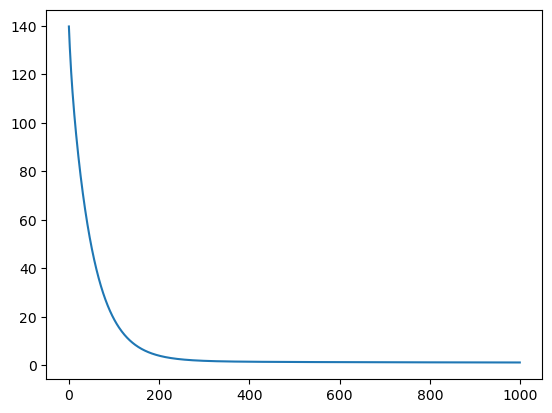

In [30]:
plt.plot(range(1000), cost_history)
plt.show()

In [31]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [32]:
coef_determination(y_test, predictions)

0.9407741666094348

In [33]:
from sklearn.metrics import *
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE:  1.3528279270421624


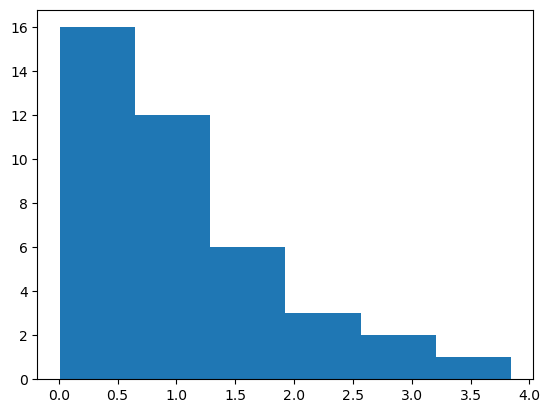

In [34]:
err_hist=np.abs(y_test-predictions)
plt.hist(err_hist,bins=6)#choix de bins à l'aide de méthode de sturges
plt.show()